In [1]:
import os
from frozen_lake_env import FrozenLakeEnv
from monte_carlo_control import MonteCarloControl
from sarsa_control import SarsaControl
from q_learning_control import QLearningControl
from grid_inputs import grid_input_4x4, grid_input_10x10
import shutil
from plotter import ComparePlotter


# make a directory to store plots
plots_dir = os.path.join(os.getcwd(), "plots")
if os.path.exists(plots_dir):
    shutil.rmtree(plots_dir)

Training for MC Control...
Episode 1000/1000 - 100.00% complete, epsilon=0.15
MC training complete!
GIF saved as /home/jceqin/me5406-project1/plots/mc_4x4/mc_4x4_q.gif
Time taken: 5.6971635818481445 seconds


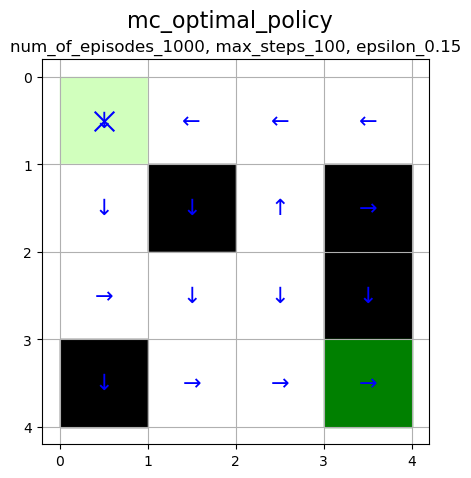

Training for SARSA Control...
Episode 1000/1000 - 100.00% complete, epsilon=0.15
SARSA training complete!
GIF saved as /home/jceqin/me5406-project1/plots/sarsa_4x4/sarsa_4x4_q.gif
GIF saved as /home/jceqin/me5406-project1/plots/sarsa_4x4/sarsa_4x4_N.gif
Time taken: 11.51775074005127 seconds


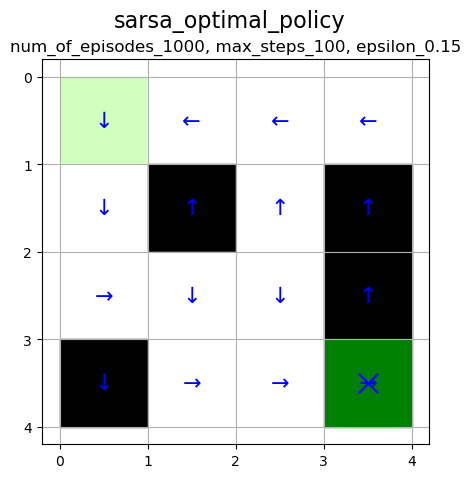

Training for Q-Learning Control...
Episode 1000/1000 - 100.00% complete, epsilon=0.15
Q-Learning training complete!
GIF saved as /home/jceqin/me5406-project1/plots/q_learning_4x4/q_learning_4x4_q.gif
GIF saved as /home/jceqin/me5406-project1/plots/q_learning_4x4/q_learning_4x4_N.gif
Time taken: 5.701019048690796 seconds


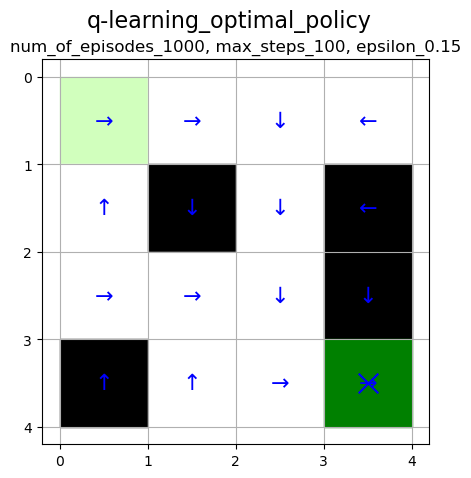

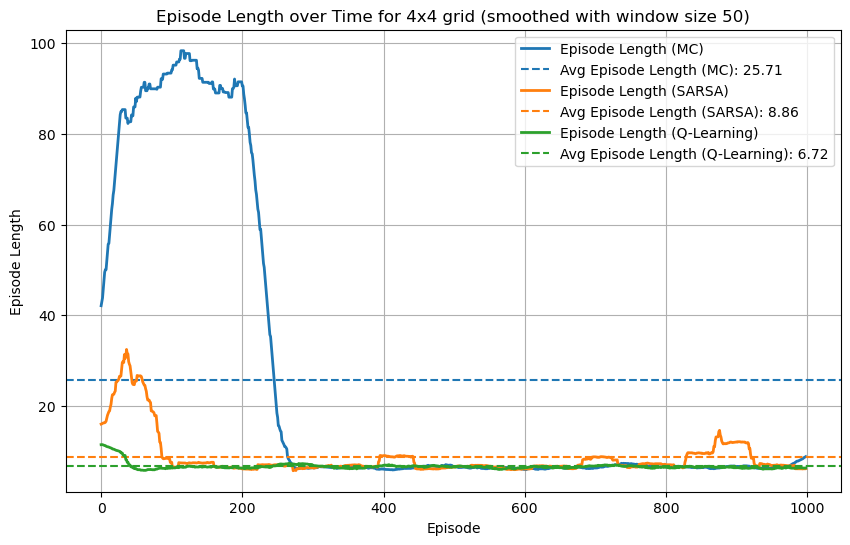

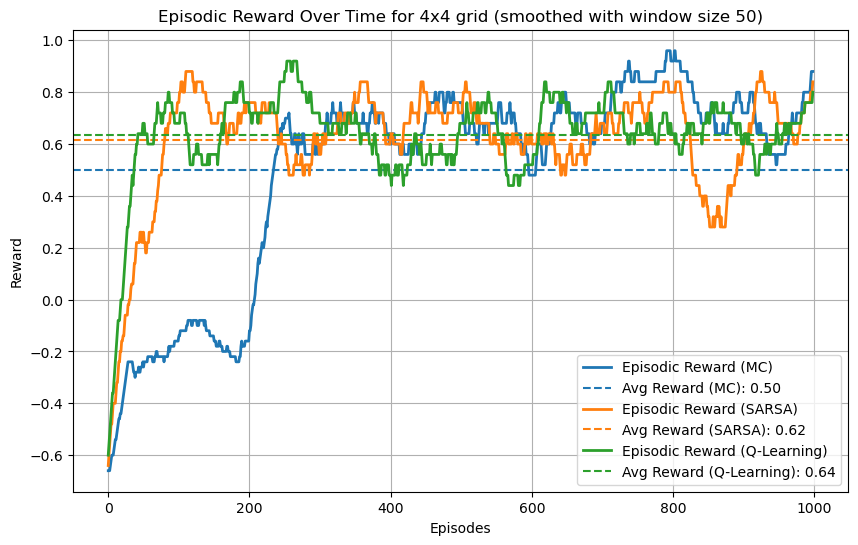

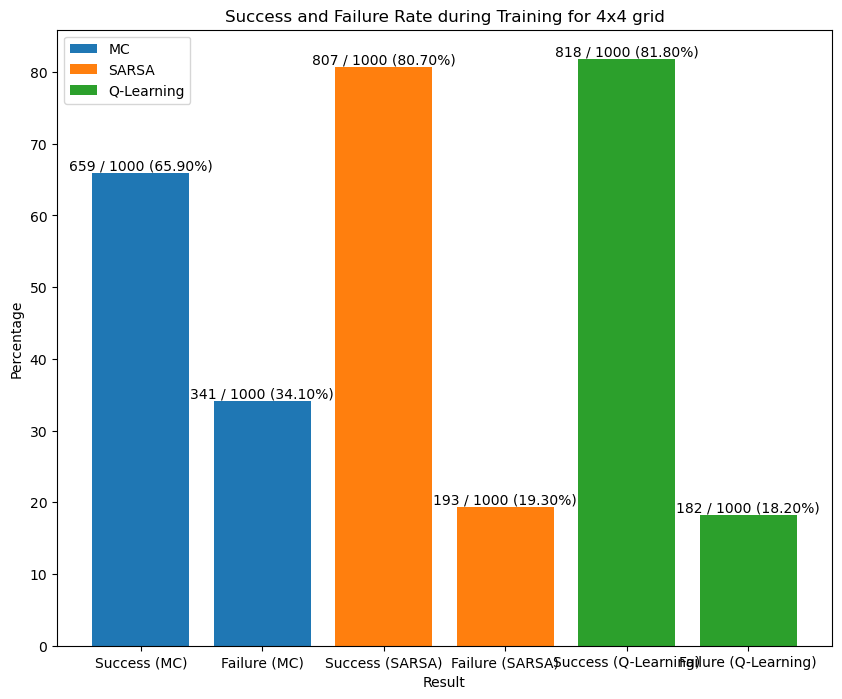

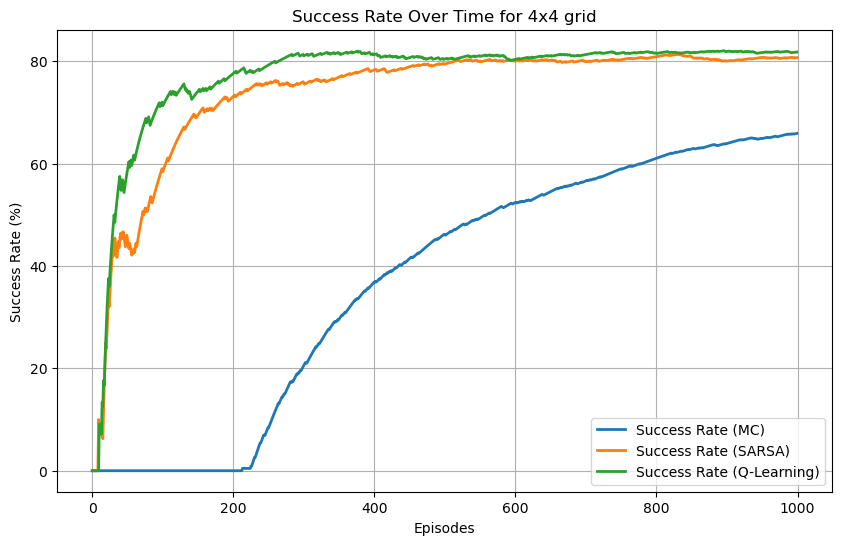

In [2]:
# 4x4 grid size
env_4x4 = FrozenLakeEnv(grid_input=grid_input_4x4)   
num_of_episodes_4x4 = 1000
max_steps_4x4 = 100
epsilon_4x4 = 0.15

# Monte Carlo Control
mc_4x4 = MonteCarloControl(env=env_4x4, 
                           num_of_episodes=num_of_episodes_4x4, 
                           max_steps=max_steps_4x4, 
                           epsilon=epsilon_4x4, 
                           plots_dir=os.path.join(os.getcwd(), "plots", "mc_4x4"))
mc_policy = mc_4x4.extract_optimal_policy()

# SARSA Control
sarsa_4x4 = SarsaControl(env=env_4x4, 
                     num_of_episodes=num_of_episodes_4x4, 
                     max_steps=max_steps_4x4, 
                     epsilon=epsilon_4x4, 
                     plots_dir=os.path.join(os.getcwd(), "plots", "sarsa_4x4"))
sarsa_policy = sarsa_4x4.extract_optimal_policy()


# Q-Learning Control
q_learning_4x4 = QLearningControl(env=env_4x4, 
                              num_of_episodes=num_of_episodes_4x4, 
                              max_steps=max_steps_4x4, 
                              epsilon=epsilon_4x4, 
                              plots_dir=os.path.join(os.getcwd(), "plots", "q_learning_4x4"))
q_learning_policy = q_learning_4x4.extract_optimal_policy()


rl_agents = [mc_4x4, sarsa_4x4, q_learning_4x4]
names = ["MC", "SARSA", "Q-Learning"]
window_size = 50
compare_plotter = ComparePlotter(rl_agents, names)
compare_plotter.plot_episode_lengths_over_time(show=True, window_size=window_size)
compare_plotter.plot_episodic_reward_over_time(show=True, window_size=window_size)
compare_plotter.plot_success_failure_bars(show=True)
compare_plotter.plot_success_rate_over_time(show=True)


Training for SARSA Control...
Episode 15000/15000 - 100.00% complete, epsilon=0.15
SARSA training complete!
GIF saved as /home/jceqin/me5406-project1/plots/sarsa_10x10/sarsa_10x10_q.gif
GIF saved as /home/jceqin/me5406-project1/plots/sarsa_10x10/sarsa_10x10_N.gif
Time taken: 50.09408402442932 seconds


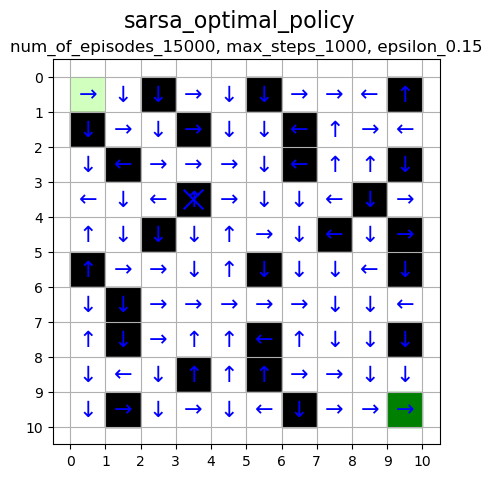

Training for Q-Learning Control...
Episode 15000/15000 - 100.00% complete, epsilon=0.15
Q-Learning training complete!
GIF saved as /home/jceqin/me5406-project1/plots/q_learning_10x10/q_learning_10x10_q.gif
GIF saved as /home/jceqin/me5406-project1/plots/q_learning_10x10/q_learning_10x10_N.gif
Time taken: 26.112914323806763 seconds


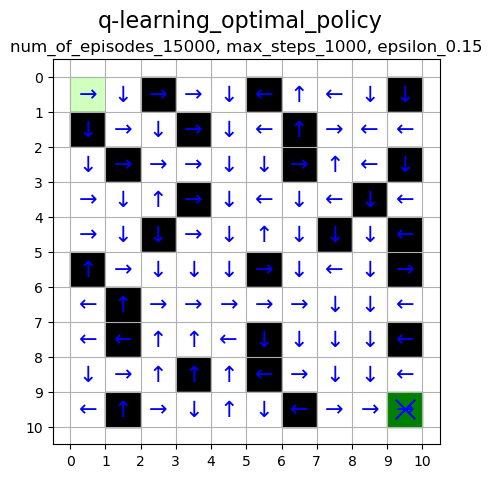

Training for MC Control...
Episode 15000/15000 - 100.00% complete, epsilon=0.15
MC training complete!
GIF saved as /home/jceqin/me5406-project1/plots/mc_10x10/mc_10x10_q.gif
Time taken: 31.36961078643799 seconds


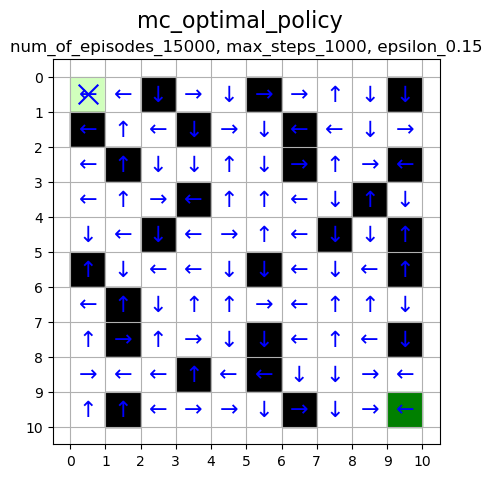

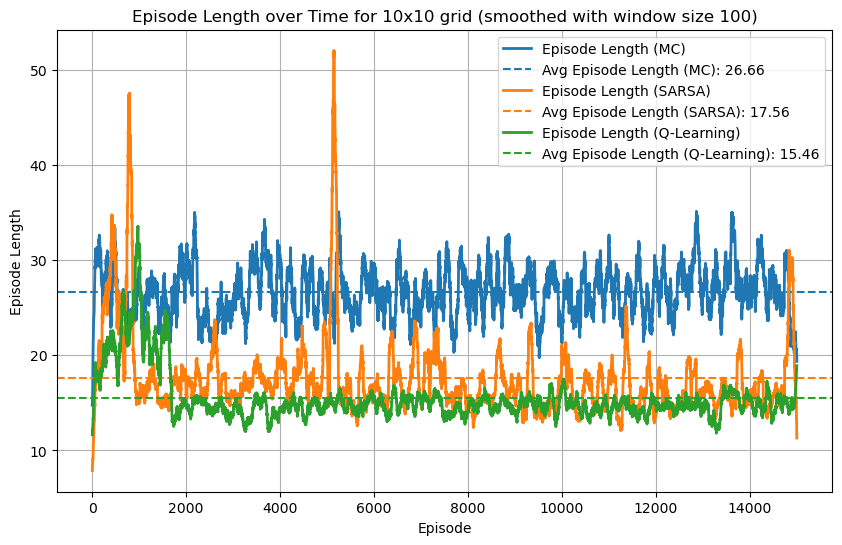

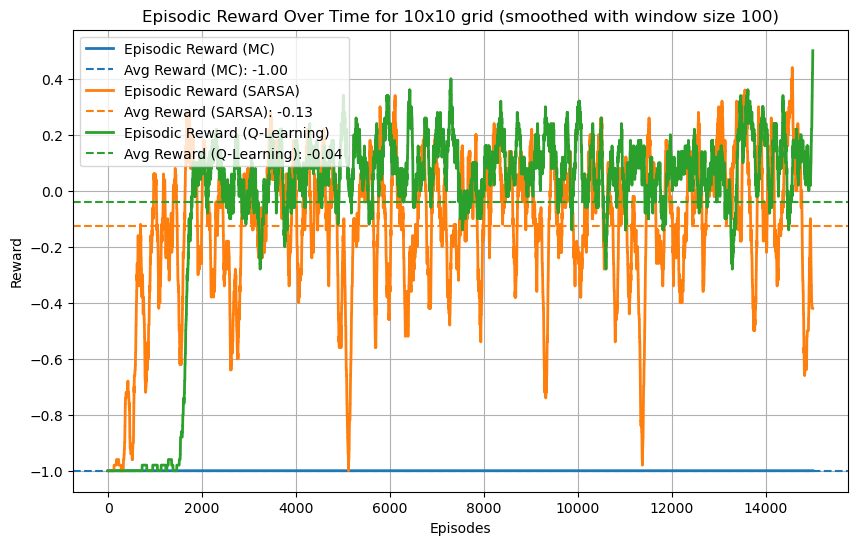

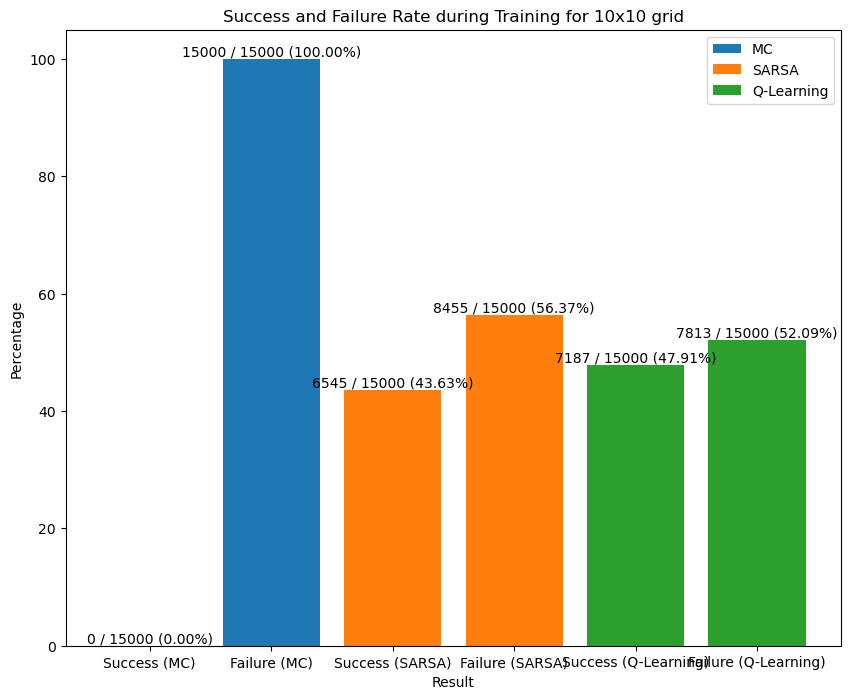

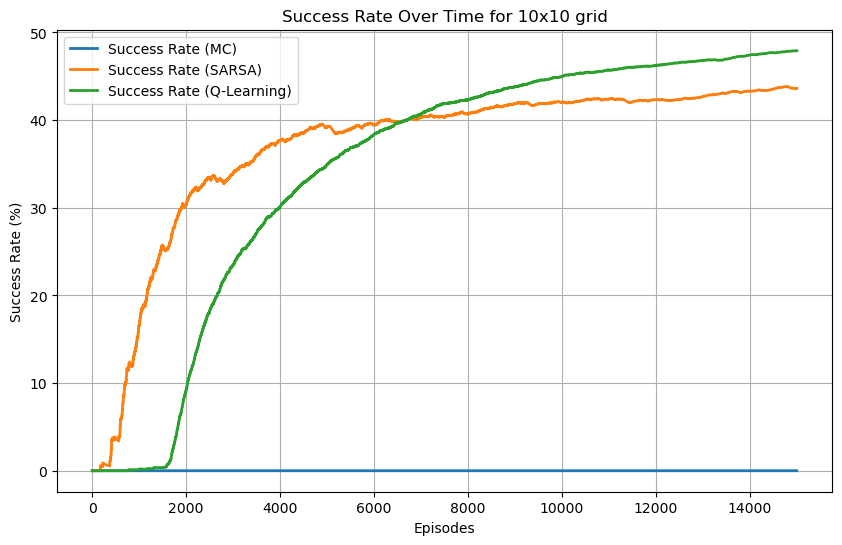

In [3]:
# 10x10 grid size

env_10x10 = FrozenLakeEnv(grid_input=grid_input_10x10)
num_of_episodes_10x10 = 15000
max_steps_10x10 = 1000
epsilon_10x10 = 0.15

# SARSA Control
sarsa_10x10 = SarsaControl(env=env_10x10, 
                           num_of_episodes=num_of_episodes_10x10, 
                           max_steps=max_steps_10x10, 
                           epsilon=epsilon_10x10, 
                           plots_dir=os.path.join(os.getcwd(), "plots", "sarsa_10x10"))
sarsa_policy_10x10 = sarsa_10x10.extract_optimal_policy()

# Q-Learning Control
q_learning_10x10 = QLearningControl(env=env_10x10, 
                                    num_of_episodes=num_of_episodes_10x10, 
                                    max_steps=max_steps_10x10, 
                                    epsilon=epsilon_10x10, 
                                    plots_dir=os.path.join(os.getcwd(), "plots", "q_learning_10x10"))
q_learning_policy_10x10 = q_learning_10x10.extract_optimal_policy()

# Monte Carlo Control
mc_10x10 = MonteCarloControl(env=env_10x10, 
                            num_of_episodes=num_of_episodes_10x10, 
                            max_steps=max_steps_10x10, 
                            epsilon=epsilon_10x10,
                            plots_dir=os.path.join(os.getcwd(), "plots", "mc_10x10"))
mc_policy_10x10 = mc_10x10.extract_optimal_policy()

rl_agents = [mc_10x10, sarsa_10x10, q_learning_10x10]
names = ["MC", "SARSA", "Q-Learning"]
window_size = 100
compare_plotter = ComparePlotter(rl_agents, names)
compare_plotter.plot_episode_lengths_over_time(show=True, window_size=window_size)
compare_plotter.plot_episodic_reward_over_time(show=True, window_size=window_size)
compare_plotter.plot_success_failure_bars(show=True)
compare_plotter.plot_success_rate_over_time(show=True)


Training for Q-Learning Control...
Episode 5000/5000 - 100.00% complete, epsilon=0.15
Q-Learning training complete!
GIF saved as /home/jceqin/me5406-project1/plots/q_learning_wo_step_penalty/q_learning_wo_step_penalty_q.gif
GIF saved as /home/jceqin/me5406-project1/plots/q_learning_wo_step_penalty/q_learning_wo_step_penalty_N.gif
Time taken: 25.60737895965576 seconds


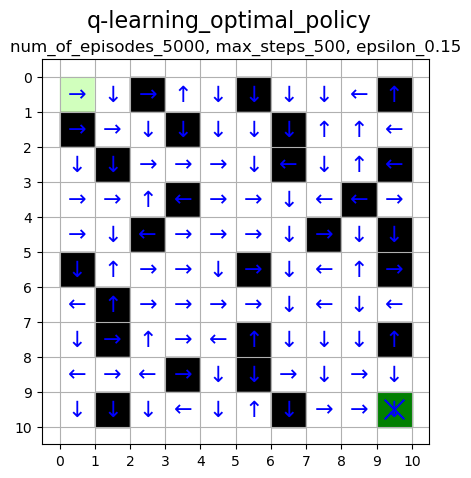

Training for Q-Learning Control...
Episode 5000/5000 - 100.00% complete, epsilon=0.15
Q-Learning training complete!
GIF saved as /home/jceqin/me5406-project1/plots/q_learning_w_step_penalty/q_learning_w_step_penalty_q.gif
GIF saved as /home/jceqin/me5406-project1/plots/q_learning_w_step_penalty/q_learning_w_step_penalty_N.gif
Time taken: 24.642605781555176 seconds


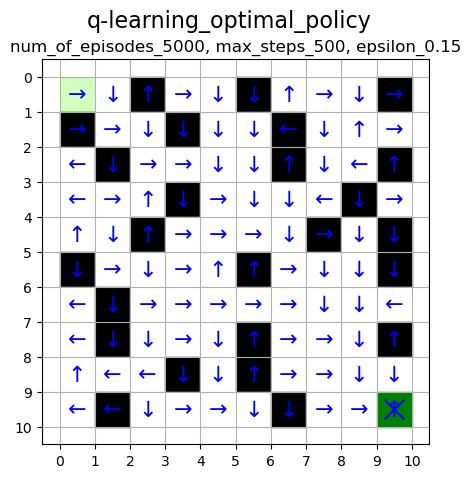

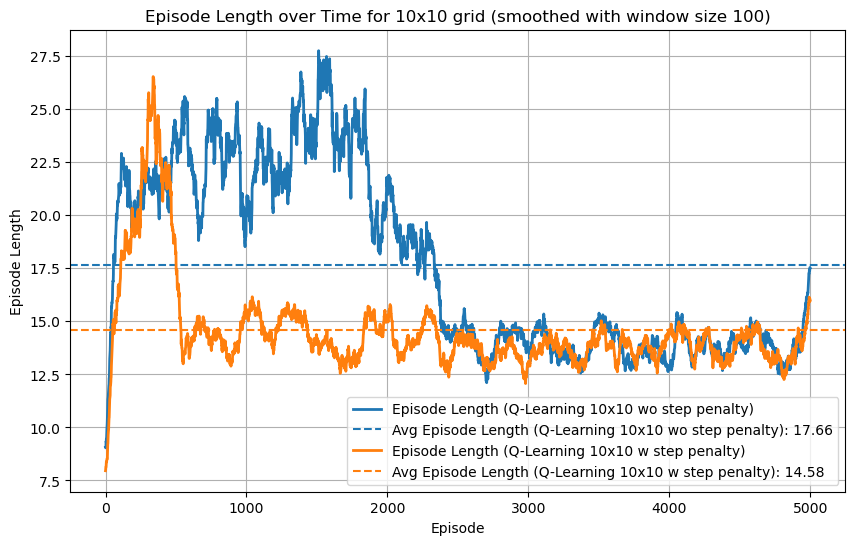

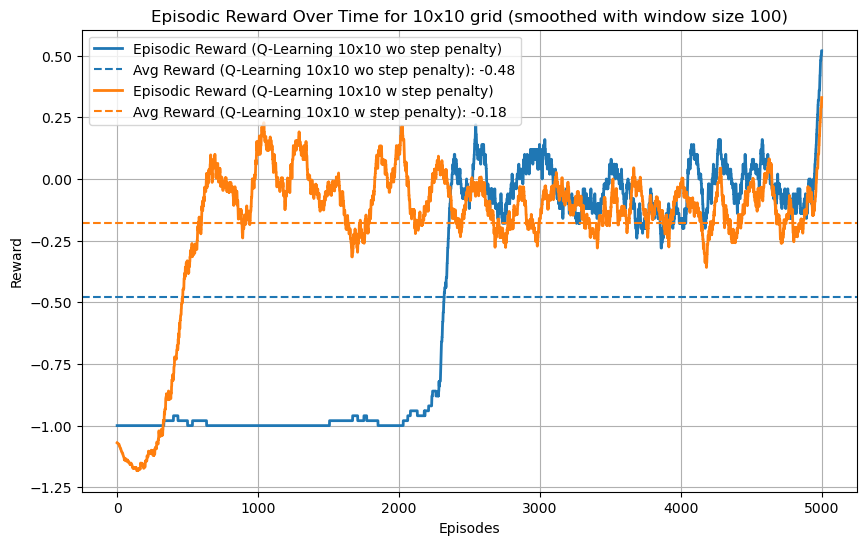

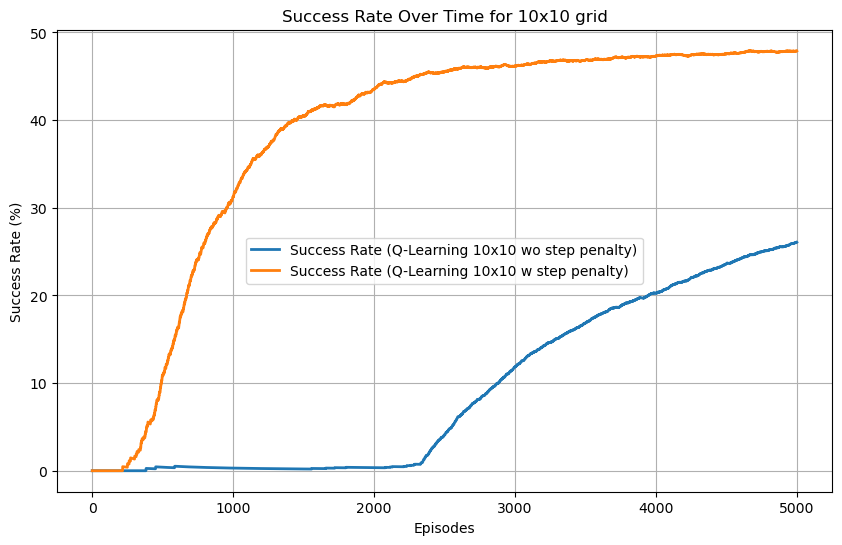

In [5]:
## Improvement: Small Penalty for Every Step Taken to Improve Convergence Speed

env_10x10_wo_step_penalty = FrozenLakeEnv(grid_input=grid_input_10x10, step_penalty=False)
env_10x10_w_step_penalty = FrozenLakeEnv(grid_input=grid_input_10x10, step_penalty=True)

num_of_episodes_10x10 = 5000
max_steps_10x10 = 500
epsilon_10x10 = 0.15

q_learning_10x10_wo_step_penalty = QLearningControl(env=env_10x10_wo_step_penalty, 
                                    num_of_episodes=num_of_episodes_10x10, 
                                    max_steps=max_steps_10x10, 
                                    epsilon=epsilon_10x10, 
                                    plots_dir=os.path.join(os.getcwd(), "plots", "q_learning_wo_step_penalty"))
q_learning_10x10_wo_step_penalty.extract_optimal_policy()

q_learning_10x10_w_step_penalty = QLearningControl(env=env_10x10_w_step_penalty, 
                                    num_of_episodes=num_of_episodes_10x10, 
                                    max_steps=max_steps_10x10, 
                                    epsilon=epsilon_10x10, 
                                    plots_dir=os.path.join(os.getcwd(), "plots", "q_learning_w_step_penalty"))
q_learning_10x10_w_step_penalty.extract_optimal_policy()

rl_agents = [q_learning_10x10_wo_step_penalty, q_learning_10x10_w_step_penalty]
names = ["Q-Learning 10x10 wo step penalty", "Q-Learning 10x10 w step penalty"]
window_size = 100
compare_plotter = ComparePlotter(rl_agents, names)
compare_plotter.plot_episode_lengths_over_time(show=True, window_size=window_size, save=False)
compare_plotter.plot_episodic_reward_over_time(show=True, window_size=window_size, save=False)
compare_plotter.plot_success_rate_over_time(show=True, save=False)